## LinearRegression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

df['PRICE'] = boston.target
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


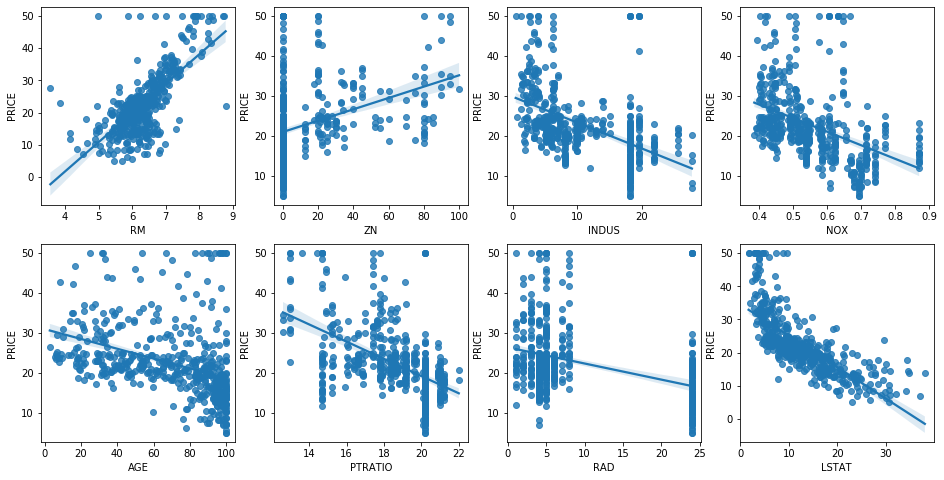

In [2]:
# 각 칼럼이 회귀 결과에 미치는 영향 확인
fig, axs = plt.subplots(figsize = (16,8), ncols=4, nrows=2)
features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','RAD','LSTAT']
for i, feature in enumerate(features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y = df['PRICE']
x = df.drop(['PRICE'], axis = 1, inplace = False)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=123)

lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, pred)))

MSE : 28.406, RMSE : 5.330
Variance score : 0.649


In [12]:
# 절편(intercept_)과 회귀계수(coefficients) 보기
print('절편 :',lr.intercept_)
print('회귀계수 :',np.round(lr.coef_,1))

절편 : 28.981270388095325
회귀계수 : [ -0.1   0.    0.1   0.3 -14.3   4.8  -0.   -1.3   0.3  -0.   -1.    0.
  -0.5]


In [13]:
# 피처별 회귀계수 값으로 다시 매핑하고 높은값 순으로 출력
coeff = pd.Series(data=np.round(lr.coef_,1), index = x.columns)
coeff.sort_values(ascending=False)

RM          4.8
CHAS        0.3
RAD         0.3
INDUS       0.1
ZN          0.0
AGE        -0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -1.0
DIS        -1.3
NOX       -14.3
dtype: float64

## Ridge

In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10으로 설정하고 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, x, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('개별 Negative MSE scores:',np.round(neg_mse_scores, 3))
print('RMSE scores:',np.round(rmse_scores, 3))
print('RMSE :{0:.3f}'.format(avg_rmse))

개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
RMSE :5.518


In [15]:
alphas = [0, 0.1, 1, 10, 100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, x, y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha {0} 일 때 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 평균 RMSE : 5.829
alpha 0.1 일 때 평균 RMSE : 5.788
alpha 1 일 때 평균 RMSE : 5.653
alpha 10 일 때 평균 RMSE : 5.518
alpha 100 일 때 평균 RMSE : 5.330


## Lasso

In [16]:
from sklearn.linear_model import Lasso, ElasticNet

# RMSE를 출력하고 회귀 계수 값들을 Df로 반환
def get_linear_reg_eval(model_name, params=None, x_n = None, y_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('#######', model_name, '######')
    for param in params:
        if model_name == 'Ridge' : model = Ridge(alpha=param)
        elif model_name == 'Lasso' : model = Lasso(alpha=param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores == cross_val_score(model, x_n, y_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0} 일 때 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
        
        model.fit(x_n, y_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=x_n.columns)
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
            
    return coeff_df

lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, x_n = x, y_n=y)

####### Lasso ######
alpha 0.07 일 때 평균 RMSE: 5.330
alpha 0.1 일 때 평균 RMSE: 5.330
alpha 0.5 일 때 평균 RMSE: 5.330
alpha 1 일 때 평균 RMSE: 5.330
alpha 3 일 때 평균 RMSE: 5.330


## Elastic Net

In [17]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas, x_n = x, y_n = y)

####### ElasticNet ######
alpha 0.07 일 때 평균 RMSE: 5.330
alpha 0.1 일 때 평균 RMSE: 5.330
alpha 0.5 일 때 평균 RMSE: 5.330
alpha 1 일 때 평균 RMSE: 5.330
alpha 3 일 때 평균 RMSE: 5.330


## Logistic regression

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

cancer = load_breast_cancer()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

x_train, x_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size = 0.3, random_state=123)

lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)

print('accuracy : {:.3f}'.format(accuracy_score(y_test, lr_pred)))
print('roc_auc : {:.3f}'.format(roc_auc_score(y_test, lr_pred)))

accuracy : 0.994
roc_auc : 0.993


In [21]:
# gridsearchCV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action='ignore')

params = {'penalty' : ['l2','l1'], 'C':[0.01,0.1,1,5,10]}
grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터 : {}, 최적 평균 정확도 : {:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터 : {'C': 1, 'penalty': 'l2'}, 최적 평균 정확도 : 0.975
